In [72]:
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
# Load Dataset
filename = 'adult.data'
names = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']
dataset = read_csv(filename, names=names)

In [43]:
# shape
print(dataset.shape)

(32561, 15)


In [44]:
# head
print(dataset.head(2))

   age      type_employer  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   

               marital        occupation    relationship    race    sex  \
0        Never-married      Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse   Exec-managerial         Husband   White   Male   

   capital_gain  capital_loss  hr_per_week         country  income  
0          2174             0           40   United-States   <=50K  
1             0             0           13   United-States   <=50K  


In [45]:
# descriptions
print(dataset.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

        hr_per_week  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [46]:
# class distribution
print(dataset.groupby('income').size())

income
 <=50K    24720
 >50K      7841
dtype: int64


In [47]:
#dataset.iloc[::2,0] = np.nan; 
#dataset.iloc[::4,1] = np.nan;
#dataset.iloc[::3,2] = np.nan;

In [48]:
dataset.head(2)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [50]:
from sklearn.model_selection import train_test_split

In [69]:
import pandas as pd
import numpy as np
data = dataset.drop('income',axis=1)
data = pd.get_dummies(data)
np.nan_to_num(X)
X = np.array(data.iloc[:, :].values)
y = np.array(dataset.iloc[:, 14].values)

In [35]:
print(X)

[[    39  77516     13 ...,      0      0      1]
 [    50  83311     13 ...,      0      0      1]
 [    38 215646      9 ...,      0      0      1]
 ..., 
 [    58 151910      9 ...,      0      0      1]
 [    22 201490      9 ...,      0      0      1]
 [    52 287927      9 ...,      0      0      0]]


In [52]:
print(y)

[' <=50K' ' <=50K' ' <=50K' ..., ' <=50K' ' <=50K' ' >50K']


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
dataset

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


C:\Users\Saanika\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


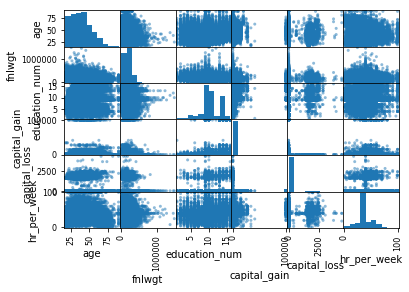

In [71]:
# scatter plot matrix 
scatter_matrix(dataset) 
pyplot.show()

In [55]:
# Spot-Check Algorithms
models = []
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy' )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.776413 (0.006663)
CART: 0.818642 (0.008840)


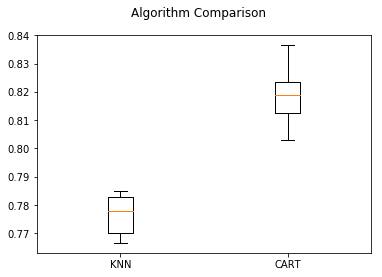

In [56]:
# Compare Algorithms 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


In [59]:
# Make predictions on validation dataset 
knn = KNeighborsClassifier() 
knn.fit(X_train, Y_train) 
predictions = knn.predict(X_test) 
print(accuracy_score(Y_test, predictions)) 
print(confusion_matrix(Y_test, predictions)) 
print(classification_report(Y_test, predictions))

0.770305542761
[[4525  393]
 [1103  492]]
             precision    recall  f1-score   support

      <=50K       0.80      0.92      0.86      4918
       >50K       0.56      0.31      0.40      1595

avg / total       0.74      0.77      0.75      6513

